<a href="https://colab.research.google.com/github/DannaCarrillo05/ApuntesIA/blob/main/ejercicioenclase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd

# Cargar el conjunto de datos
url = "https://raw.githubusercontent.com/adiacla/bigdata/refs/heads/master/pacientes.csv"
df = pd.read_csv(url)

# Mostrar las primeras filas para inspeccionar los datos
df

,edad,colesterol,problema_cardiaco
0,63.0,233.0,1
1,NaN,250.0,0
2,37.0,250.0,0
3,41.0,204.0,0
4,56.0,236.0,1
...,...,...,...
297,63.0,187.0,0
298,63.0,197.0,0
299,59.0,176.0,0
300,57.0,241.0,1


In [43]:
#en este paso vamos a determinar si hay nulos
df.isnull().sum()

,0
edad,2
colesterol,2
problema_cardiaco,0


In [44]:
#vamos a determinar los estadisticos del dataframe
df.describe()

,edad,colesterol,problema_cardiaco
count,300.000000,300.000000,302.000000
mean,54.303333,247.280000,0.493377
std,9.090661,51.855681,0.500786
min,29.000000,126.000000,0.000000
25%,47.000000,211.750000,0.000000
50%,55.000000,242.500000,0.000000
75%,61.000000,275.250000,1.000000
max,77.000000,564.000000,1.000000


In [45]:
#determine la estadistica de las variables objeto del dataframe
df.describe(include='object')


ValueError: No objects to concatenate

In [46]:
#agregue la informacion del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   edad               300 non-null    float64
 1   colesterol         300 non-null    float64
 2   problema_cardiaco  302 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 7.2 KB


In [47]:
#imputamos mediana en los valores flatantes en edad y colesterol
df['edad']=df['edad'].fillna(df['edad'].median())
df['colesterol']=df['colesterol'].fillna(df['colesterol'].median())
print(df.isnull().sum())

edad                 0
colesterol           0
problema_cardiaco    0
dtype: int64


In [48]:
#comprobar que no hay valores nulos
df.isnull().sum()

,0
edad,0
colesterol,0
problema_cardiaco,0


In [49]:
#en este paso debemos normalizar las columnas edad y colesterol con skitlearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['edad', 'colesterol']] = scaler.fit_transform(df[['edad', 'colesterol']])
df


,edad,colesterol,problema_cardiaco
0,0.708333,0.244292,1
1,0.541667,0.283105,0
2,0.166667,0.283105,0
3,0.250000,0.178082,0
4,0.562500,0.251142,1
...,...,...,...
297,0.708333,0.139269,0
298,0.708333,0.162100,0
299,0.625000,0.114155,0
300,0.583333,0.262557,1


In [50]:
#guardar el scaler en un archvo . joblib para usarlo porteriormente
import joblib
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [51]:
#vamos a mostrar la forma on shape del dataframe df
df.shape

(302, 3)

In [52]:
# en este paso dividimos lo features que son Edad y Colesterol y dejamos la
# etiqueta problemas_cardiaco
X = df[['edad', 'colesterol']]
y = df['problema_cardiaco']

In [53]:
#dividimos los datos de entrenamientos con los datos de prubea, fijamos la semilla en 42, ademas hacemos el stratify
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [54]:
#vericamos la cantidad de datos que quedaron en entrenamiento y en prueba
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(241, 2)
(61, 2)
(241,)
(61,)


#**Entrenamiento del Modelo Naive Bayes**

In [55]:
#con los datos de entrenamiento realizamos un entrenamiento un modulo de naive bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

#**Entrenamiento del Modelo KNN**

In [56]:
#con los datos de entrenamiento entrenamos un modelo de knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#**Entrenamiento del Modelo Maquina de Soporte Vectorial de Clasificacion**

In [57]:
#con los datos de entrenamiento entrenamos un modelo de maquina de soporte vectorial de clasificacion
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

##Prediccion con Naive Bayes

In [58]:
#hacemos la predciccion con el modelo entrenado de Naive Bayes
y_pred_nb = nb.predict(X_test)

print("Predicciones con Naive Bayes:")
y_pred_nb

Predicciones con Naive Bayes:


array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [59]:
#vamos a mostrar el y_train en formato de arreglo
y_test.to_numpy()

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

accuracy:  0.7540983606557377


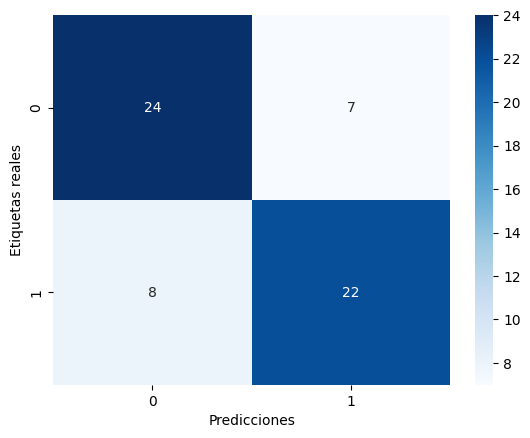

In [60]:
#evaluar el modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print("accuracy: ", accuracy_score(y_test, y_pred_nb))

#mostramos utilizando seaborn la matriz de confunsion de la prediccion y el valor de la etiqueta de entrenamiento
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred_nb)

# Crear el mapa de calor
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Configurar los nombres de los ejes
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas reales')

# Mostrar el gráfico
plt.show()

llegaron 3 pacientes nuevos, el primer paciente tiene 38 años de edad con un colesterol de 170, el segundo paciente tien una edad de 65 años con un colesterol de 235, le tercer paciente tiene una edad de 42 con un coleterol de 180, po rfavor haga las predicciones y determineme cuales pacientes sufren o sufriran del corazon

In [61]:
#convertimos en un arreglo los siguientes datos: 38,170  65,235  42,180
pacientes_nuevos = [[38, 170], [65, 235], [42, 180]]

In [62]:
#creamos un dataframe de los datos
pacientes_nuevos_df = pd.DataFrame(pacientes_nuevos, columns=['edad', 'colesterol'])
#vamos a normalizar el arreglo pacientes_nuevos con el modelos scaler
pacientes_nuevos_norm = scaler.transform(pacientes_nuevos_df)
pacientes_nuevos_norm

array([[0.1875    , 0.10045662],
       [0.75      , 0.24885845],
       [0.27083333, 0.12328767]])